In [13]:
from keras.models import Sequential
import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

In [14]:
# Initialising the CNN
classifier = Sequential()

In [15]:
# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [16]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())

In [17]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 2919,
                         epochs = 8,
                         validation_data = test_set,
                         validation_steps = 704)

Found 2215 images belonging to 2 classes.
Found 551 images belonging to 2 classes.
Epoch 1/8
2919/2919 [==============================] - 1560s 535ms/step - loss: 0.0594 - accuracy: 0.9784 - val_loss: 9.4565e-04 - val_accuracy: 0.9801
Epoch 2/8
2919/2919 [==============================] - 1525s 522ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0054 - val_accuracy: 0.9764
Epoch 3/8
2919/2919 [==============================] - 1527s 523ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0767 - val_accuracy: 0.9783
Epoch 4/8
2919/2919 [==============================] - 1535s 526ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 2.0827e-05 - val_accuracy: 0.9837
Epoch 5/8
2919/2919 [==============================] - 1489s 510ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0650 - val_accuracy: 0.9854
Epoch 6/8
2919/2919 [==============================] - 1499s 513ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.5057 - val_accuracy: 0.9910
Epoch 7/8
2919/2919 [

In [22]:
#classifier.save('CNN.h5')

In [19]:
Classifier = keras.models.load_model('CNN.h5')
import cv2

In [9]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
cv2.imwrite('opencv1.png', image)
del(camera)

In [10]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('opencv1.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 0:
    prediction = 'mask'
else:
    prediction = 'no mask'


'no mask'

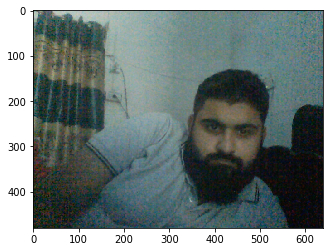

In [11]:
prediction
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('opencv1.png'))
prediction

In [12]:
cap=cv2.VideoCapture(0)
while(True):
    ret , frame=cap.read()
    cv2.imshow('video',frame)
    if(cv2.waitKey(1)&0xFF==ord('q')):
        break
cap.release()    
cv2.destroyAllWindows()